<a href="https://colab.research.google.com/github/Mina93178/Deep_learning_frame_work/blob/main/Neural_network_frame_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Set Module**

In [ ]:
import pandas as pd
import numpy as np
import pickle
import os
class dataset:
    def __init__(self, dataset_name, path):
        self.dataset_name = dataset_name
        self.path = path

    def get_dataset(self):
        if self.dataset_name == 'mnist':
            training_set = pd.read_csv(self.path)
            testing_set = pd.read_csv("mnist_test.csv")
            training_set = np.array(training_set)
            testing_set = np.array(testing_set)
            training_labels = np.array(training_set[:, 0]) # all rows of first columns
            training_examples = np.array(training_set[:, 1:]) #all data except first column
            training_labels = np.atleast_2d(training_labels)
            testing_labels = np.array(testing_set[:, 0])
            testing_examples = np.array(testing_set[:, 1:])
            testing_labels = np.atleast_2d(testing_labels)
            #print(testing_labels)

            return training_examples/255, training_labels,  testing_examples/255, testing_labels # X , Y
        elif self.dataset_name == 'cifar_10':
            training_examples = []
            training_labels = []
            names = os.listdir(self.path)
            for name in names:
                if '_batch' in name:
                    with open(self.path+'/'+name, 'rb') as f:
                        data = pickle.load(f, encoding='bytes')
                        if 'test' in name: #test_batch
                            testing_examples = data[b'data']
                            testing_labels = data[b'labels']
                        else:#data_batches
                            training_examples.append(data[b'data'])
                            training_labels.append(data[b'labels'])
            training_examples = np.array(training_examples)
            training_labels = np.array(testing_labels)
            training_labels = training_labels.reshape((-1, 1))
            training_examples = training_examples.reshape((-1,3072))
            testing_labels = np.atleast_2d(testing_labels)
            training_labels = np.atleast_2d(training_labels.T) # onerow


            return training_examples/255, training_labels,  testing_examples/255, testing_labels


    def labels_to_onehot(self,labels):
        max = np.max(labels)
        max = int(max)
        enc = np.zeros((max + 1, labels.shape[1]))
        for i in range(labels.shape[1]):
            for j in range(max):
                enc[j][i] = (labels[0][i] == j)  ###hot encoding trainLabels
                if (labels[0][i] == 9):
                    enc[9][i] = 1
        onehot_labels = enc
        return onehot_labels
'''
data_set = dataset('mnist', 'C:\\Users\\FacultyStudent\\PycharmProjects\\final_NN')
X_tr, Y_tr, X_te, Y_te = data_set.get_dataset()
#print (X_tr)
#print('##########################')
#print (X_tr.shape)
#print (Y_tr.shape)
#print (data_set.labels_to_onehot(Y_tr.T))
'''



"\ndata_set = dataset('mnist', 'C:\\Users\\FacultyStudent\\PycharmProjects\\final_NN')\nX_tr, Y_tr, X_te, Y_te = data_set.get_dataset()\n#print (X_tr)\n#print('##########################')\n#print (X_tr.shape)\n#print (Y_tr.shape)\n#print (data_set.labels_to_onehot(Y_tr.T))\n"

**Initialization**

In [ ]:
import numpy as np

class initialization:
    '''
    <spanclass="font-weight-bold comment">
    " This is the initialization class which will initialize the weights and biases for the layers of any model . "
    </span>
    '''
    def __init__(self,dimension_layers):
        self.dimension_layers = dimension_layers
        '''
        <spanclass="font-weight-bold comment">
        " The Constructor of this class takes the a list contains the number of hidden units in each layer ."
        
        :type dimension_layers: List . 
        :param dimension_layers: list of the number of hidden units in each hidden layer .
        
        </span>
        '''


    def initialize_parameters(self): # [6,5,9,1]

        '''
         <spanclass="font-weight-bold comment">
         " This function will initialize a random values for weights and zeros for biases using the
                            dimension_layers list . "

         :type parameters: dictionary .
         :param parameters: this dictionary contains the weights and biases with the same dimension as
                                each layers' dimension .
        </span>
        '''
        parameters = {}
        np.random.seed(3)
        for layer in range(1, len(self.dimension_layers)):
            #parameters['W' + str(l)] = np.random.normal(0,1,(self.dimension_layers[l], self.dimension_layers[l - 1])) * 0.01
            parameters['W' + str(layer)] = np.random.randn(self.dimension_layers[layer], self.dimension_layers[layer - 1]) * 0.1 
            parameters['b' + str(layer)] = np.zeros((self.dimension_layers[layer], 1))
        #print("This is the parameters")
        #print(parameters)
        #print("##############################")
        return parameters



'''
init=initialization([5,4,3])
parameters=init.initialize_parameters()
print(parameters)
for i in range(1,len(parameters)):
    print(parameters["W" + str(i)].shape)
    print(parameters["b" + str(i)].shape)
    print("########################")
'''


'\ninit=initialization([5,4,3])\nparameters=init.initialize_parameters()\nprint(parameters)\nfor i in range(1,len(parameters)):\n    print(parameters["W" + str(i)].shape)\n    print(parameters["b" + str(i)].shape)\n    print("########################")\n'

In [ ]:
pip install numpy=="1.19.4"

**Initialization of Layers**

In [ ]:
#from init import initialization
class layers():
    '''
    This Class was just to keep the naming convention of the models , this will use the init function to get the weights
                & biases of the hidden layers .
    '''
    def __init__(self,layers_dimensions):
        self.layers_dimensions=layers_dimensions
        '''
                    " This function will initialize a random values for weights and zeros for biases using the
                                dimension_layers list "

                    :type layers_dimensions: list
                    :param layers_dimensions: list of the number of hidden units in each hidden layer . 

        '''
    def layers_init(self): # [5,4,6,7,1]
        init=initialization(self.layers_dimensions)
        return init.initialize_parameters()

'''
inputs = [1,6,4,7,1]
layerrrrrr=layers(inputs)
parameters = layerrrrrr.layers_init()
print(parameters)
'''

'\ninputs = [1,6,4,7,1]\nlayerrrrrr=layers(inputs)\nparameters = layerrrrrr.layers_init()\nprint(parameters)\n'

**ACtivation functions**

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

class Sigmoid:
    '''
    "The class concerned the Sigmoid function which will calculate it and it's derivative for the sake of forward
                and backward propagation respectively . "
    '''
    def forward(self, z):
        '''

        :param z: The result of multiplying ( Weight * input ) + bias
        :return: The sigmoid of the input
        '''
        sig = 1 / (1 + np.exp(-z))
        act_packet = z
        return sig, act_packet

    def derivative(self,z):
        '''
        :param z: The sigmoid input
        :return: The shortcut result of the derivative of the sigmoid function
        '''
        sig = 1 / (1 + np.exp(-z))
        return sig*(1-sig)
    def backward(self,dA,act_packet):
        '''

        :param dA: Derivative of the Loss function with respect the sigmoid function
        :param act_packet: The value of the Z , which is the output before entering the activation function
        :return:
        '''
        #derivative_of_sigmoid = self.derivative(act_packet)
        #dz=np.multiply(dA,derivative_of_sigmoid)
        #test = np.ones_like(dz)
        return dA




# backward activation here #

class relu:
    '''
    The class concerned the relu function which will calculate it and it's derivative for the sake of forward
                and backward propagation respectively .
    '''
    def forward(self, z):
        '''

        :param z: The relu input
        :return: the relu output for the input
        '''
        rel = np.maximum(0, z)
        act_packet = z
        return rel, act_packet
# backward action here
    def backaward(self,dLA, activation_packet):
        '''

        :param dLA: Derivative of the Loss function with respect the relu function
        :param activation_packet: The value of the Z , which is the output before entering the activation function
        :return: the derivative of the cost function with respect to Z
        '''

        Z = activation_packet
        #print("Z")
        #print(Z.shape)
        dZ = np.array(dLA, copy=True)  # just converting dz to a correct object.

        # When z <= 0, you should set dz to 0 as well.
        #dZ[Z<=0] = 0
        dZ = np.where(Z>0,1,0)
        assert (dZ.shape == Z.shape)
        return dZ
      #  print(type(Z))
        #dZ = np.array(dLA, copy=True)  # just converting dz to a correct object.
     #   print(type(dZ))
        # dl/dz = dl/da * da/dz .. as da/dz = 1 if the z > 0 when we are using relu activation function when z>0 , so dl/dz = dl/da if z>0
        # but if z<=0 so da/dz will equal 0 then dl/dz = 0
        # When z <= 0, you should set dz to 0 as well.


class leaky_relu:
    '''
    The class concerned the leaky_relu function which will calculate it and it's derivative for the sake of forward
                and backward propagation respectively .
    '''
    def forward(self,z):
        '''

        :param z: the leaky_relu input
        :return: the leaky_relu output of the input
        '''
        y1 = ((z > 0) * z)
        y2 = ((z <= 0) * z * 0.01)
        leaky= y1 + y2
        act_packet = z
        return leaky , act_packet

    def backaward(self, dLA, activation_packet):
        '''
        :param dLA: Derivative of the Loss function with respect the leaky_relu function
        :param activation_packet: The value of the Z , which is the output before entering the activation function
        :return: the derivative of the cost function with respect to Z
        '''

        Z = activation_packet
        # print("Z")
        # print(Z.shape)
        dZ = np.array(dLA, copy=True)  # just converting dz to a correct object.

        # When z <= 0, you should set dz to 0 as well.
        dZ[Z <= 0] = 0
        # dZ = np.where(Z>0,1,0)
        assert (dZ.shape == Z.shape)
        return dZ

class tanh:
    '''
     The class concerned the tanh function which will calculate it and it's derivative for the sake of forward
                and backward propagation respectively .
    '''
    def forward(self,z):
        '''
        :param z: the tanh input
        :return: the tanh output of the input
        '''
        TANH = np.tanh(z)
        act_packet = z
        return TANH , act_packet
    def diff(self,z):
        '''
        :param z : the input to the tanh function
        :return : the backward shortcut result of the derivative of the tanh function w.r.t the Z
        '''
        tanh=self.forward(z)
        return (1-np.square(tanh))
    def backward(self,dA,act_packet):
        '''

        :param dA: Derivative of the Loss function with respect the tanh function
        :param act_packet: The value of the Z , which is the output before entering the activation function
        :return: the derivative of the cost w.r.t  Z ( dL/dZ = dL/dA * dA/dZ )
        '''
        derivative_of_tanh = self.diff(act_packet)
        dz=np.multiply(dA,derivative_of_tanh)
        #test = np.ones_like(dz)
        return dz

class Softmax():
    '''
    '''
    def forward(self, z):
        '''
        :param z: the input to the softmax function
        :return: the forward output of the softmax activation function
        '''
        act_packet = z
        ans = np.exp(z - np.max(z))
        ans = ans / ans.sum(axis=0)
        return ans, act_packet


    def diff(self,dA):
        '''
        :param dA: derivative of Loss w.r.t the output of the softmax activation function
        :return: the derivative of the loss w.r.t Z --> the output before entering the activation function
        '''
        #dA = np.ones(z.shape)
        #m, n = z.shape
        #p = self.__call__(z)
        #tensor1 = np.einsum('ij,ik->ijk', p, p)  # (m, n, n)
        #tensor2 = np.einsum('ij,jk->ijk', p, np.eye(n, n))  # (m, n, n)
        #dz = tensor2 - tensor1
        #dz = np.einsum('ijk,ik->ij', dz, dA)
        #return dz
        return dA

'''
dummy=(np.arange(100)/10)-5
test_sigmoid = tanh()
result , act = test_sigmoid.forward(dummy)
#print(result)
plt.plot(dummy,result)
plt.show()
'''
'''
dummy=[3.1, -9.3, 7, 8.7, 3.6, 5.2, 4.7, -2.2, 3.1, -6.6]
test_soft_max=softmax()
result , act_packet = test_soft_max.forward(dummy)
print(result)
'''

'\ndummy=[3.1, -9.3, 7, 8.7, 3.6, 5.2, 4.7, -2.2, 3.1, -6.6]\ntest_soft_max=softmax()\nresult , act_packet = test_soft_max.forward(dummy)\nprint(result)\n'

**Forward_prop Class**

In [ ]:
import numpy as np
#from layers import layers
#import activations
class forward_prop:
    '''
    " This Class is Concerned with calculating the two parts of the forward propagation :
      identity part : calculating the product of the forward propagation before entering the activation function
      activation part : takes the output of the identity part and outputs the prediction based on the kind of the
                        activation function
    '''
    def identity_forward(self,X,W,b):
        '''
        :param X: the input of the current layer
        :param W: the weights of the current layer
        :param b: biases of the current layer
        :return: - The product of ( Weights * input ) + biases ,
                 - a Tuple which contains the Values of input , weights and biases of the current layer as to be used
                    in the backward propagation
        '''
        Z = np.dot(W, X) + b
       # print(Z)
        forward_packet = (X, W, b)
        return Z , forward_packet

    def activation_forward(self,input,W,b,activation_type):
        '''
        :param input: the input of the current layer
        :param W: the weights of the current layer
        :param b: biases of the current layer
        :param activation_type: Type of activation function used in the forward propagation
        :return: - A --> the output of the activation function
                 - packet_of_packets --> Tuple of 2 elements which will be used in backward propagation :
                     1- linear packer : contains ( input , weights , biases ) of the current layer
                     2- activation packet : contains ( Z ) which is the input to the activation function
        '''
        if activation_type == "sigmoid":
            Z, linear_packet = self.identity_forward(input, W, b) ## Z = input * w + b
            temp=Sigmoid()
            A, activation_packet = temp.forward(Z) ## A = sig(z)

        elif activation_type == "relu":
            Z, linear_packet = self.identity_forward(input, W, b)
            temp =  relu()
            A, activation_packet = temp.forward(Z)

        elif activation_type == "leaky_relu":
            Z, linear_packet = self.identity_forward(input, W, b)
            temp =  leaky_relu()
            A, activation_packet = temp.forward(Z)
        elif activation_type == "tanh":
            Z, linear_packet = self.identity_forward(input, W, b)
            temp =  tanh()
            A, activation_packet = temp.forward(Z)
        elif activation_type == "softmax":
            Z, linear_packet = self.identity_forward(input, W, b)
            #temp =
            A, activation_packet = Softmax().forward(Z)
        elif activation_type == "linear":
            Z, linear_packet = self.identity_forward(input, W, b)
            # temp =
            A, activation_packet = Z,Z

        else:
            raise ValueError("ERROR : Activation Function is Not Determined")

        packet_of_packets = linear_packet, activation_packet
        return A, packet_of_packets
    '''
    def activation_forward_with_droupout(self, input, W, b, droupouRatio,activation_type):
        if activation_type == "sigmoid":
            Z, linear_packet = self.identity_forward(input, W, b)  ## Z = input * w + b
            temp = activations.Sigmoid()
            A, activation_packet = temp.forward(Z)  ## A = sig(z)
            droup = np.random.randn(A.shape[0], A.shape[1])
            droup = (droup < droupouRatio)
            A = A * droup
            A = A / droupouRatio
            activation_packet = Z, droup

        elif activation_type == "relu":
            Z, linear_packet = self.identity_forward(input, W, b)
            temp = activations.relu()
            A, activation_packet = temp.forward(Z)
            droup=np.random.randn(A.shape[0],A.shape[1])
            droup=(droup<droupouRatio)
            A=A*droup
            A=A/droupouRatio
            activation_packet = Z,droup

        elif activation_type == "leaky_relu":
            Z, linear_packet = self.identity_forward(input, W, b)
            temp = activations.leaky_relu()
            A, activation_packet = temp.forward(Z)
            droup = np.random.randn(A.shape[0], A.shape[1])
            droup = (droup < droupouRatio)
            A = A * droup
            A = A / droupouRatio
            activation_packet = Z, droup

        elif activation_type == "tanh":
            Z, linear_packet = self.identity_forward(input, W, b)
            temp = activations.tanh()
            A, activation_packet = temp.forward(Z)
            droup = np.random.randn(A.shape[0], A.shape[1])
            droup = (droup < droupouRatio)
            A = A * droup
            A = A / droupouRatio
            activation_packet = Z, droup

        elif activation_type == "softmax":
            droupouRatio=1
            Z, linear_packet = self.identity_forward(input, W, b)
            # temp =
            A, activation_packet = activations.Softmax().forward(Z)
            droup = np.random.randn(A.shape[0], A.shape[1])
            droup = (droup < droupouRatio)
            A = A * droup
            A = A / droupouRatio
            activation_packet = Z, droup

        else:
            raise ValueError("pierre Was here")

        packet_of_packets = linear_packet, activation_packet
        return A, packet_of_packets

    '''
'''
test_cases=forward_prop()
np.random.seed(1)
A = np.random.randn(3, 2)
W = np.random.randn(1, 3)
b = np.random.randn(1, 1)
Z , forward_packet = test_cases.identity_forward(A,W,b)
print(forward_packet)
'''

'\ntest_cases=forward_prop()\nnp.random.seed(1)\nA = np.random.randn(3, 2)\nW = np.random.randn(1, 3)\nb = np.random.randn(1, 1)\nZ , forward_packet = test_cases.identity_forward(A,W,b)\nprint(forward_packet)\n'

**Forward_propagation Model**

In [ ]:
#from layers import layers
#from forward_prop import forward_prop
class forward_model():
    '''
    " Class of Applying Forward propagation process . "
    '''
    def forward_model (self,X,parameters,activations):
        '''
        :param X: The input to the current layer as to start the forward propagation process
        :param parameters: Weights and biases of the current layer
        :param activations : list of the activation functions of each layer
        :return : - Y_hat ( predictions resulted from the current layer's forward propagation )
                  - packet of packets : Tuple of 2 elements which will be used in backward propagation :
                     1- linear packer : contains ( input , weights , biases ) of the current layer
                     2- activation packet : contains ( Z ) which is the input to the activation function
        '''
        packet_of_packets = []
        A = X # as for the first time A will equal to the input layer
        #print("first input")
        #print(A)
        #print(type(parameters))
        L = len(parameters) // 2  # number of layers in the neural network
        #print(L)
        test_forward=forward_prop()
        for l in range(1, L):
            A_prev = A
            A, packet = test_forward.activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation_type=activations[l])
            packet_of_packets.append(packet)

        prediction, packet = test_forward.activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation_type="softmax")
        packet_of_packets.append(packet)



        return prediction, packet_of_packets


'''
dimensions = [3,5,1]
test_model=forward_model(dimensions)
AL , caches = test_model.forward_model([1,5,4])
print(AL)
print("###########################")
print(caches)
'''

'\ndimensions = [3,5,1]\ntest_model=forward_model(dimensions)\nAL , caches = test_model.forward_model([1,5,4])\nprint(AL)\nprint("###########################")\nprint(caches)\n'

**Costs Module**

In [ ]:
import numpy as np
class square_difference():
    '''
    "This is the class which is Concerned with Calculating the SSD loss & it's derivative "
    '''
    def __init__(self,true_label,Y_hat):
        '''
        :param true_label: The true classes of the input training examples
        :param Y_hat: the output of the forward propagation .. the prediction of Training .. the output from the
                        activation function
        '''
        self.true_label=true_label
        self.Y_hat=Y_hat
    def cost(self):
        '''
        :return: The value of the cost using the SSD Loss function
        '''
        #cost =0.5 * np.mean(np.dot(np.transpose((self.true_label - self.Y_hat)), (self.true_label - self.Y_hat)) * (1/self.true_label.shape[0]))
        m = self.true_label.shape[1]
        #print(self.Y_hat.shape)
        logprobs = np.multiply(-np.log(self.Y_hat), self.true_label) + np.multiply(-np.log(1 - self.Y_hat), 1 - self.true_label)
        cost = 1. / m * np.nansum(logprobs)
        #cost = np.nansum(logprobs)
        return cost
    def backprop_cost(self,cache):
        '''
        :param cache: a tuple which contains the values of ( input , weight , bias ) of the current layer
        :return: returns the back propagation loss value for back propagation calculations
        '''
        X , W , b = cache
        #def_cost = np.mean(np.dot(X,(self.Y_hat-self.true_label).T))
        def_cost = self.Y_hat - self.true_label
        return def_cost     # dA

class regularization:
    '''
    "Implementing the cost function with L2 regularization."
    '''
    def compute_cost_with_regularization(self,prediction, Y, parameters, lambd,loss_type):
        '''
        :param prediction  -- post-activation, output of forward propagation, of shape (output size, number of examples)
        :param Y -- "true" labels vector, of shape (output size, number of examples)
        :param parameters -- python dictionary containing parameters of the model
        :return: cost - value of the regularized loss function (formula (2))
        '''
        m = Y.shape[1]
        x=0
        temp = len(parameters) //2
        if (loss_type=="SSD"):
            #print("hi")
            cross_entropy_cost = square_difference(Y,prediction).cost()  # This gives you the cross-entropy part of the cost
        elif (loss_type=="multiclass"):
                # print("hi")
                cross_entropy_cost = multiclass_loss(Y,prediction).cost()  # This gives you the cross-entropy part of the cost
        for i in range(1,temp):
           x=+np.sum(np.square (parameters["W"+str(i)]))
        ### START CODE HERE ### (approx. 1 line)
        L2_regularization_cost = lambd / (2 * m) * x
        ### END CODER HERE ###

        cost = cross_entropy_cost + L2_regularization_cost

        return cost
class loglikelihood():
    '''
    "This is the class which is Concerned with Calculating the loglikelihood loss & it's derivative "
    '''
    def __init__(self, true_label, Y_hat):
        '''
       :param true_label: The true classes of the input training examples
       :param Y_hat: the output of the forward propagation .. the prediction of Training .. the output from the
                        activation function
        '''
        self.true_label = true_label
        self.Y_hat = Y_hat
    def cost(self):
        '''
         :return: The value of the cost using the loglikelihood Loss function
        '''
        cost = 0.5*(np.mean(-1*np.log(np.abs((self.true_label/2)-0.5+self.Y_hat))))
        return cost
    def backprop_cost(self,cache):
        '''
        :param cache: a tuple which contains the values of ( input , weight , bias ) of the current layer
        :return: returns the back propagation loss value for back propagation calculations
        '''
        X , W , b = cache
        def_cost= np.mean((np.dot(-1*self.Y_hat*X)/(1+np.exp(np.dot(self.true_label,self.Y_hat)))))
        return def_cost



class multiclass_loss():
    '''
    "This is the class which is Concerned with Calculating the multiclass loss & it's derivative "
    '''
    def __init__(self, Y, Y_hat):
        '''
        :param true_label: The true classes of the input training examples
        :param Y_hat: the output of the forward propagation .. the prediction of Training .. the output from the
                              activation function
        '''
        self.Y = Y
        self.Y_hat = Y_hat
    def cost(self):
        '''
        :return: The value of the cost using the multiclass Loss function
        '''
        #m = self.Y.shape[1]
       # logprobs = np.multiply(-np.log(self.Y_hat), self.Y) + np.multiply(-np.log(1 - self.Y_hat), 1 - self.Y)
        #cost = 1. / m * np.nansum(logprobs)
        cost = -(1/ self.Y.shape[1]) * np.sum(np.multiply(self.Y, np.log(self.Y_hat)))
        return cost
    
    def backprop_cost(self,cache):
        '''
        :param cache: a tuple which contains the values of ( input , weight , bias ) of the current layer
        :return: returns the back propagation loss value for back propagation calculations
        '''
        X , W , b = cache
        #def_cost = np.mean(np.dot(X,(self.Y_hat-self.true_label).T))
        def_cost = self.Y_hat - self.Y
        return def_cost  



class identity_loglikelihood():
    '''
    "The class which is concerned with calculating the loglikelihood loss function with identity activation function"
    '''
    def __init__(self, true_label, Y_hat):
        '''
        :param true_label: The true classes of the input training examples
        :param Y_hat: the output of the forward propagation .. the prediction of Training .. the output from the
                                      activation function
        '''
        self.true_label = true_label
        self.Y_hat = Y_hat
    def cost(self):
        '''
        :return: the Cost value of the loglikelihood loss with an identity activation
        '''
        cost =  (np.mean(np.log(1+(np.exp(-1*self.true_label*self.Y_hat)))))
        return cost


class perceptron_model_loss():
    '''
    "The perceptron criteria loss Class"
    '''
    def __init__(self, true_label, Y_hat):
        '''
        :param true_label: The true classes of the input training examples
        :param Y_hat: the output of the forward propagation .. the prediction of Training .. the output from the
                                              activation function
        '''
        self.true_label = true_label
        self.Y_hat = Y_hat
    def cost(self):
        '''
        :return: the Cost value of the perceptron model loss with an identity activation
        '''
        cost = np.argmax(0,-1*np.dot(self.true_label,self.Y_hat))
        return cost


class hinge_loss():
    '''
    "The hinge_loss (SVM) loss Class"
    '''
    def __init__(self, true_label, Y_hat):
        '''
        :param true_label: The true classes of the input training examples
        :param Y_hat: the output of the forward propagation .. the prediction of Training .. the output from the
                                                      activation function
        '''
        self.true_label = true_label
        self.Y_hat = Y_hat
    def cost(self):
        '''
        :return : the Cost value of the loss with an identity activation
        '''
        cost = np.argmax(0,(-1*np.dot(self.true_label,self.Y_hat))+1)
        return cost

'''
y_hat=np.array([0.5,0.35,0.83,0.73])
#y_hat=y_hat.T
labels=np.array([1,1,1,-1])
test_loss=loglikelihood(labels,y_hat)
print(test_loss.cost())
'''
'''
y_hat=np.array([0,-0.6,1.6,1])
#y_hat=y_hat.T
labels=np.array([1,1,1,-1])
test_loss=identity_loglikelihood(labels,y_hat)
print(test_loss.cost())
'''

'\ny_hat=np.array([0,-0.6,1.6,1])\n#y_hat=y_hat.T\nlabels=np.array([1,1,1,-1])\ntest_loss=identity_loglikelihood(labels,y_hat)\nprint(test_loss.cost())\n'

**Back_propagation Class**

In [ ]:
import numpy as np
#import Losses
#import activations
class backward_model:
    '''
    " The class which is concerned with calculating the back propagation gradients , which will be used to update the
        weights and biases through the training process
    '''
    def identity_backward(self,dz,linear_packet,lambd):
        '''
        :param dz: The derivative of the loss w.r.t the input to the activation function (Z)
        :param linear_packet: a tuple which contains ( the input , weights and biases of the current layer )
        :param lambd: the Regularization parameter
        :return: - delta_input_previous , the gradient of the past input
                 - delta_w : gradient of the weights of the current layer
                 - delta_b : the gradient of the biases of the current layer
        '''
        A_prev, W, b = linear_packet
        m = A_prev.shape[1]
        if lambd:
            delta_w = (1 / m) * np.dot(dz, A_prev.T) + (lambd / m) * W  # derivative of loss w.r.t (w)
        else:
            delta_w = (1 / m) * np.dot(dz, A_prev.T)  # derivative of loss w.r.t (w)
        #delta_w =np.dot(dz, A_prev.T)  # derivative of loss w.r.t (w)
        delta_b = (1 / m) * np.sum(dz, axis=1, keepdims=True) # derivative of loss w.r.t (b)
        delta_input_prev = np.dot(W.T, dz)  # derivative of loss w.r.t (input)
        return delta_input_prev, delta_w, delta_b


    def activation_backward(self,delta_A,packet_of_packets, activation_type,lambd):
        '''
        :param delta_A: the derivative of the loss function w.r.t the activation function
        :param packet_of_packets: Tuple of 2 elements which will be used in backward propagation :
                     1- linear packer : contains ( input , weights , biases ) of the current layer
                     2- activation packet : contains ( Z ) which is the input to the activation function
        :param activation_type: the type of the activation function used in this layer
        :param lambd: regularization parameter
        :return: - delta_input_previous , the gradient of the past input
                 - delta_w : gradient of the weights of the current layer
                 - delta_b : the gradient of the biases of the current layer
        '''
        linear_packet, act_packet = packet_of_packets

        if activation_type == "relu":
            #print("hi")
            temp =relu()
            dZ = temp.backaward(delta_A, act_packet)    # we have to implement this relu backward function
            dA_prev, dW, db = self.identity_backward(dZ,linear_packet,lambd)
        elif activation_type == "sigmoid":
            #print("hi")
            temp = Sigmoid()
            dZ = temp.backward(delta_A, act_packet)
            dA_prev, dW, db = self.identity_backward(dZ,linear_packet,lambd)
        # we will start from here tomorrow , we have to deal with Y_hat , y_true while creating instance from cost class
       # temp = Losses.square_difference()
        #dA = temp.backprop_cost(self.linear_packet)
        elif activation_type == "softmax":
            temp = Softmax()
            dZ = temp.diff(delta_A)
            dA_prev, dW, db = self.identity_backward(dZ, linear_packet,lambd)

        return dA_prev, dW, db



'''
dA = np.array([[0.208,0.613]]).T
z = np.array([[0.702,0.867]]).T
A = np.array([[0.808,0.604]]).T
W = np.array([[0.323,0.076],[0.614,0.106]]).T
b = np.array([[0.676,0.360]]).T
linear_packet = (A,W,b)
act_packet = z
packet_of_packets = linear_packet , act_packet
da_prev , dW , dB = backward_model().activation_backward(dA,packet_of_packets,"sigmoid")
print(f"da_prev = {da_prev} ")
print(f"dW = {dW} ")
print(f"db = {dB} ")
'''

'\ndA = np.array([[0.208,0.613]]).T\nz = np.array([[0.702,0.867]]).T\nA = np.array([[0.808,0.604]]).T\nW = np.array([[0.323,0.076],[0.614,0.106]]).T\nb = np.array([[0.676,0.360]]).T\nlinear_packet = (A,W,b)\nact_packet = z\npacket_of_packets = linear_packet , act_packet\nda_prev , dW , dB = backward_model().activation_backward(dA,packet_of_packets,"sigmoid")\nprint(f"da_prev = {da_prev} ")\nprint(f"dW = {dW} ")\nprint(f"db = {dB} ")\n'

**Back_propagation Module**

In [ ]:
import numpy as np
#import back_prop
#import Losses
class model_backward_general:
    '''
    " The Class which is concerned with combining the back propagation functions to form an integrated backprop model ."
    '''
    def __init__(self,Predictions,true_label,packet_of_packets,loss_function,lambd,activation_functions):
        '''
        :param Predictions: Y-hat --> the output of the activation function
        :param true_label: the true classes' values (labels)
        :param activation_functions : the type of activation function in each layer
        :param packet_of_packets: Tuple of 2 elements which will be used in backward propagation :
                     1- linear packer : contains ( input , weights , biases ) of the current layer
                     2- activation packet : contains ( Z ) which is the input to the activation function
        :param loss_function: type of the loss function
        :param lambd: regularization parameter
        :return : gradients of weights and biases
        '''
        self.lambd=lambd
        self.activation_functions = activation_functions
        self.predictions = Predictions
        self.Y = true_label
        self.packet_of_packets=packet_of_packets
        self.loss_function_type=loss_function
    def model_backward(self):
        gradients = {}
        L = len(self.packet_of_packets)  # the number of layers
        # m = self.predictions.shape[1]
        #  Y = self.Y.reshape(self.predictions.shape)  # after this line, Y is the same shape as AL

        # Initializing the backpropagation by getting the derivative of the cost function we are using wrt the output ( dl/dA )

        #  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))  # derivative of cost with respect to AL
        #   dAL = np.mean(np.dot(X.T,(self.predictions-self.Y)))
        temp = backward_model()
        current_cache = self.packet_of_packets[L - 1]

        # if (self.loss_function_type=="SSD"):
        #     temp_loss = Losses.square_difference(self.Y, self.predictions)
        #     dAL = temp_loss.backprop_cost(current_cache[0])
        # elif (self.loss_fuction_type=="LLH"):
        #     temp_loss = Losses.loglikelihood(self.Y, self.predictions)
        #     dAL = temp_loss.backprop_cost(current_cache[0])
        if (self.loss_function_type=="SSD"):
            temp_loss =  square_difference(self.Y, self.predictions)
            dAL = temp_loss.backprop_cost(current_cache[0])
        elif (self.loss_function_type=="multiclass"):
            temp_loss =  multiclass_loss(self.Y, self.predictions)
            dAL = temp_loss.backprop_cost(current_cache[0])

        gradients["dA" + str(L - 1)], gradients["dW" + str(L)], gradients["db" + str(L)] = temp.activation_backward(dAL,current_cache,"softmax",self.lambd)

        # Loop from l=L-2 to l=0
        for l in reversed(range(L - 1)):
            # lth layer: (RELU -> LINEAR) gradients.
            # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)]
            current_cache = self.packet_of_packets[l]
            dA_prev_of_l, dW_of_l, db_of_l = temp.activation_backward(gradients["dA" + str(l + 1)], current_cache, self.activation_functions[l-1],self.lambd)
            gradients["dA" + str(l)] = dA_prev_of_l
            gradients["dW" + str(l + 1)] = dW_of_l
            gradients["db" + str(l + 1)] = db_of_l

        return gradients

    '''
    def model_backward_with_droupout(self):
        gradients = {}
        #        linear_packet , activation_packet = self.packet_of_packets
        L = len(self.packet_of_packets)  # the number of layers
        # m = self.predictions.shape[1]
        #  Y = self.Y.reshape(self.predictions.shape)  # after this line, Y is the same shape as AL

        # Initializing the backpropagation by getting the derivative of the cost function we are using wrt the output ( dl/dA )

        #  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))  # derivative of cost with respect to AL
        #   dAL = np.mean(np.dot(X.T,(self.predictions-self.Y)))
        # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
        # grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = None
        temp = back_prop.backward_model()
        current_cache = self.packet_of_packets[L - 1]

        # if (self.loss_function_type=="SSD"):
        #     temp_loss = Losses.square_difference(self.Y, self.predictions)
        #     dAL = temp_loss.backprop_cost(current_cache[0])
        # elif (self.loss_fuction_type=="LLH"):
        #     temp_loss = Losses.loglikelihood(self.Y, self.predictions)
        #     dAL = temp_loss.backprop_cost(current_cache[0])
        if (self.loss_function_type == "SSD"):
            temp_loss = Losses.square_difference(self.Y, self.predictions)
            dAL = temp_loss.backprop_cost(current_cache[0])
        elif (self.loss_function_type == "multiclass"):
            temp_loss = Losses.multiclass_loss(self.Y, self.predictions)
            dAL = temp_loss.backprop_cost(current_cache[0])

        gradients["dA" + str(L - 1)], gradients["dW" + str(L)], gradients["db" + str(L)] = temp.activation_backward(dAL,current_cache,"softmax",self.lambd)

        # Loop from l=L-2 to l=0
        for l in reversed(range(L - 1)):
            # lth layer: (RELU -> LINEAR) gradients.
            # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)]
            current_cache = self.packet_of_packets[l]
            dA_prev_of_l, dW_of_l, db_of_l = temp.activation_backward(gradients["dA" + str(l + 1)], current_cache,"sigmoid", self.lambd)
            gradients["dA" + str(l)] = dA_prev_of_l
            gradients["dW" + str(l + 1)] = dW_of_l
            gradients["db" + str(l + 1)] = db_of_l

        return gradients
    '''


**Optimization Module**

In [ ]:
import numpy as np
class momentum:
    '''
    " The class concerned The momentum optimization "
    '''

    def __init__(self,parameters):
        '''
        :param parameters: the Weights and biases of The current model
        '''
        self.parameters=parameters


    def velocity_preparation(self):
        '''
        :return: Velocity parameter for weights and biases as to update the parameters using momentum GD
        '''
        weights = len(self.parameters) // 2  # number of layers in the neural networks
        v = {}
        # Initialize velocity
        for w in range(weights):
            v["dW" + str(w + 1)] = np.zeros((self.parameters["W" + str(w + 1)].shape[0], self.parameters["W" + str(w + 1)].shape[1]))
            v["db" + str(w + 1)] = np.zeros((self.parameters["b" + str(w + 1)].shape[0], self.parameters["b" + str(w + 1)].shape[1]))
        return v


    def update_with_momentum(self,velocity,learning_rate,exponentially_weighted_average_parameter,gradients):
        '''
        :param velocity: Velocity of the gradient with momentum
        :param learning_rate: the learning rate
        :param exponentially_weighted_average_parameter: Beta , the momentum hyperparameter
        :param gradients: dW , dB , the gradients of the weights and biases of each layer
        :return: parameters: updated weights and biases
                 velocity : updated velocity to be used in the next iteration
        '''
        L = len(self.parameters) // 2  # number of layers in the neural networks
        for l in range(L):
            # compute velocities
             velocity["dW" + str(l + 1)] = exponentially_weighted_average_parameter * velocity["dW" + str(l + 1)] + (1 - exponentially_weighted_average_parameter) *  gradients['dW' + str(l + 1)]
             velocity["db" + str(l + 1)] = exponentially_weighted_average_parameter *  velocity["db" + str(l + 1)] + (1 - exponentially_weighted_average_parameter) * gradients['db' + str(l + 1)]
            # update parameters
             self.parameters["W" + str(l + 1)] = self.parameters["W" + str(l + 1)] -  learning_rate *  velocity["dW" + str(l + 1)]
             self.parameters["b" + str(l + 1)] = self.parameters["b" + str(l + 1)] -  learning_rate *  velocity["db" + str(l + 1)]

        return self.parameters, velocity




class ADAM:
    '''
    " The class concerned ADAM optimization technique "
    '''
    def __init__(self,parameters):
        '''
        :param parameters: The weights and biases for each layer before any updates
        '''
        self.parameters=parameters


    def adam_preparation(self):
        '''
        " Initialization of ADAM optimization's parameters"
        :return: EWA : exponentially weighted average parameter
                 RMS : Root mean square prop parameter
        '''
        L = len(self.parameters) // 2  # number of layers in the neural networks
        EWA = {}
        RMS = {}

        # Initialize v, s. Input: "parameters". Outputs: "v, s".
        for l in range(L):
            # exponentially weighted average parameters
            EWA["dW" + str(l + 1)] = np.zeros((self.parameters["W" + str(l + 1)].shape[0], self.parameters["W" + str(l + 1)].shape[1]))
            EWA["db" + str(l + 1)] = np.zeros((self.parameters["b" + str(l + 1)].shape[0], self.parameters["b" + str(l + 1)].shape[1]))
            # RMS prop average parameters
            RMS["dW" + str(l + 1)] = np.zeros((self.parameters["W" + str(l + 1)].shape[0], self.parameters["W" + str(l + 1)].shape[1]))
            RMS["db" + str(l + 1)] = np.zeros((self.parameters["b" + str(l + 1)].shape[0], self.parameters["b" + str(l + 1)].shape[1]))

        return EWA, RMS

    def update_with_adam(self,EWA,RMS,learning_rate,parameters,gradients,epoch_num,frist_beta=0.9,second_beta=0.995,epsilon=1e-8,):
        '''
        :param EWA: Exponentially weighted average parameter
        :param RMS: RMS prop parameter
        :param learning_rate: the learning rate
        :param parameters: weights and biases before update
        :param gradients: the Gradients of weights and biases for the current model's layers
        :param epoch_num: the Epoch number
        :param frist_beta: Beta_1 , the first hyperparameter for Exponentially weighted average's parameter
        :param second_beta:Beta_2 , the 2nd hyperparameter for RMS prop's parameter
        :param epsilon: The safety margin as to not divide by zero
        :return: :param parameters : The updated parameters of the current model
                 :param: EWA : the updated Exponentially weighted average parameters
                 :param RMS : the updated RMS prop parameters
        '''

        L = len(parameters) // 2  # number of layers in the neural networks
        EWA_corrected = {}  # Initializing first moment estimate, python dictionary
        RMS_corrected = {}  # Initializing second moment estimate, python dictionary

        # Perform Adam update on all parameters
        for l in range(L):

            EWA["dW" + str(l + 1)] = frist_beta * EWA["dW" + str(l + 1)] + (1 - frist_beta) * gradients['dW' + str(l + 1)]
            EWA["db" + str(l + 1)] = frist_beta * EWA["db" + str(l + 1)] + (1 - frist_beta) * gradients['db' + str(l + 1)]
            #EWA_corrected["dW" + str(l + 1)] = EWA["dW" + str(l + 1)] / ((1 - frist_beta ** epoch_num)+epsilon)
            #EWA_corrected["db" + str(l + 1)] = EWA["db" + str(l + 1)] / ((1 - frist_beta ** epoch_num)+epsilon)
            RMS["dW" + str(l + 1)] = second_beta * RMS["dW" + str(l + 1)] + (1 - second_beta) * np.square(gradients['dW' + str(l + 1)])
            RMS["db" + str(l + 1)] = second_beta * RMS["db" + str(l + 1)] + (1 - second_beta) * np.square(gradients['db' + str(l + 1)])
            #RMS_corrected["dW" + str(l + 1)] = RMS["dW" + str(l + 1)] / ((1 - second_beta ** epoch_num)+epsilon)
            #RMS_corrected["db" + str(l + 1)] = RMS["db" + str(l + 1)] / ((1 - second_beta ** epoch_num)+epsilon)
            parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * EWA["dW" + str(l + 1)] / (np.sqrt(RMS["dW" + str(l + 1)]) + epsilon)
            parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * EWA["db" + str(l + 1)] / (np.sqrt(RMS["db" + str(l + 1)]) + epsilon)


        return parameters, EWA,RMS


**Metric Module**

In [ ]:
import numpy as np
import pandas as pd
#from forward_model import forward_model

class evaluation_metrics:
    def __init__(self, labels, input,parameters,activation_functions):
        self.input = input
        self.Y_true = labels
        self.parameters=parameters
        self.activations=activation_functions
#Accuracy = (TP+TN)/(TP+FP+FN+TN)
    def confusionMatrix(self):
        y_hat=[]
        predictions,packet_of_packets=forward_model().forward_model(self.input,self.parameters,self.activations)
        predictions=predictions.T
       # print(predictions.shape)
       # print(predictions)
       # print(predictions.shape)
        for i in range(predictions.shape[0]):
            max=np.argmax(predictions[i])
            y_hat.append(max)
       # print(len(y_hat))
       # print(y_hat)
       # print(self.Y_true.shape)
       # print(self.Y_true)
        #print(y_hat)
        classes = set(self.Y_true[0])
       # print("sklearn accraucy : ")
        #print(accuracy_score(self.Y_true[0],y_hat))
        number_of_classes = len(classes)
        conf_matrix = pd.DataFrame(
            np.zeros((number_of_classes, number_of_classes), dtype=int),
            index=classes,
            columns=classes)
        for i, j in zip(self.Y_true[0], y_hat):
            conf_matrix.loc[i, j] += 1
        return conf_matrix.values, conf_matrix

    def TP(self):
        values, cm = self.confusionMatrix()
        return np.diag(cm)

    def FP(self):
        values, cm = self.confusionMatrix()
        return np.sum(cm, axis=0) - self.TP()

    def FN(self):
        values, cm = self.confusionMatrix()
        return np.sum(cm, axis=1) - self.TP()

    def Accuracy(self, data_size):
        return np.sum(self.TP()/data_size)

    def Precision(self):
        return np.mean(self.TP() / (self.TP() + self.FP()))

    def Recall(self):
        return np.mean(self.TP() / (self.TP() + self.FN()))

    def F1_score(self):
        if self.TP() > 0:
            return 2 * ((self.Precision() * self.Recall()) / (self.Precision() + self.Recall()))
        else:
            return 0

'''
Y_hat = np.array([0, 1, 2, 3, 4, 2, 3, 3, 2, 1, 2, 3, 1, 5, 1, 1, 9, 8, 7, 6])
Y_true = np.array([0, 1, 3, 3, 2, 5, 5, 3, 2, 1, 4, 3, 2, 1, 1, 2, 9, 8, 7, 6])
ev = evaluation_metrics(Y_true, Y_hat)
values, cm = ev.confusionMatrix()
print (values)
print (confusion_matrix(Y_true, Y_hat))
print (ev.Precision())
print (precision_score(Y_true, Y_hat, average='macro'))
print (ev.Recall())
print (recall_score(Y_true, Y_hat, average='macro'))
print (ev.Accuracy(20.))
print (accuracy_score(Y_true, Y_hat))
print (ev.F1_score())
print (f1_score(Y_true, Y_hat, average='macro'))
'''



"\nY_hat = np.array([0, 1, 2, 3, 4, 2, 3, 3, 2, 1, 2, 3, 1, 5, 1, 1, 9, 8, 7, 6])\nY_true = np.array([0, 1, 3, 3, 2, 5, 5, 3, 2, 1, 4, 3, 2, 1, 1, 2, 9, 8, 7, 6])\nev = evaluation_metrics(Y_true, Y_hat)\nvalues, cm = ev.confusionMatrix()\nprint (values)\nprint (confusion_matrix(Y_true, Y_hat))\nprint (ev.Precision())\nprint (precision_score(Y_true, Y_hat, average='macro'))\nprint (ev.Recall())\nprint (recall_score(Y_true, Y_hat, average='macro'))\nprint (ev.Accuracy(20.))\nprint (accuracy_score(Y_true, Y_hat))\nprint (ev.F1_score())\nprint (f1_score(Y_true, Y_hat, average='macro'))\n"

**Saving And Loading Module**

In [ ]:
import pickle
numbers=[]
for i in range(1001):
    numbers.append(i)
class SAL:
    def Save_model(self,parameters):
        value=numbers[0]
        file_name=f"model{value}.sav"
        pickle.dump(parameters, open(file_name, "wb"))
        numbers.remove(value)
        #print(numbers)
        return file_name
    def Load_model(self,file_name):
        loaded_model = pickle.load(open(file_name, "rb"))
        return loaded_model

**Batch Training Module**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#import layers  , forward_model , Losses , backward_model
#from dataset import dataset
#from Metric import evaluation_metrics
from matplotlib import style
import shelve
import pickle
#from Saving_and_loading import SAL
#import matplotlib; matplotlib.use("TkAgg")
#style.use('fivethirtyeight')
#fig = plt.figure()
#ax1 = fig.add_subplot(1, 1, 1)
class training_model:
    '''
    " The Training class using batch gradient descent "
    '''
    def __init__(self,X, Y,layers_dimenstions,activation_functions, alpha=0.6 , no_of_iterations=100, print_cost = True, lambd = 0 ,beta=0.9,momentum=0,ADAM=0 ):
        '''
        :param X: The input of the first layer
        :param Y: the True labels of the training examples
        :param layers_dimenstions : the number of hidden units in each hidden layer
        :param activation_functions : the type of activation function in each hidden layer
        :param alpha: learning rate
        :param no_of_iterations: number of iterations
        :param print_cost: boolean variable , put it with ( True ) value if you want to print the cost every 10
                        iterations
        :param lambd: regularization parameter

        :return : The Trained Parameters for a certain model trained on a certain dataset
        '''
        self.input = X
        self.Y=Y
        self.learning_rate = alpha
        self.no_of_iterations = no_of_iterations
        self.print_cost=print_cost
        self.regularization_parameter=lambd
        self.dimension_layers = layers_dimenstions
        self.activation_functions = activation_functions
        self.adam_or_not=ADAM
        self.momentum_or_not=momentum
        self.Beta=beta

    def update_parameters(self,parameters, grads, learning_rate):
        '''
          "The function which is used to update the weights and biases of the model with Vanilla Gradient descent ."
        :param parameters: weights and biases of the past iteration ( before updating )
        :param grads: the Gradients of the weights and biases , the output of the backward propagation
        :param learning_rate: The learning rate
        :return: parameters : updated weights and biases after completing one iteration of the training
        '''
        L = len(parameters) // 2  # number of layers in the neural network
        for l in range(L):
            parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
            parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]

        return parameters

    def animate(i):
        '''
        "A function which is used to draw a live plotting of the Cost function during the training process "
        '''

        graph_data = open('costs.txt', 'r').read()
        lines = graph_data.split('\n')
        xs = []
        ys = []

        # plt.title("Learning rate =" + str(self.learning_rate))
        for line in lines:
            if len(line) > 1:
                x, y = line.split(',')
                xs.append(float(x))
                ys.append(float(y))
        #ax1.clear()
        #plt.ylabel('cost')
        #plt.xlabel('iterations')
        #ax1.plot(xs, ys)



    def save_model(self, filename):
        """Saves model by its name in the directory specified."""

        with shelve.open(filename) as db:
            db['self'] = self

    def train(self):

        '''
         " This function considered as the integration of all the past Modules together to start training any model
           the deep learning engineer will have the option to choose :
           1- the layers dimensions
           2- the activation function of each layer
           3- the loss type
           4- the number of iterations
          this function will plot live graph for the training cost and finally will print the the accuracy resulted
           from the test set training using the parameters resulted from the training set training .
        :return: The Trained parameters
        '''


        temp_layers= layers(self.dimension_layers)
        # Initialize parameters dictionary.
        parameters = temp_layers.layers_init()
        #print (parameters)
        #print (parameters)
        #print("weights:")
        #print(parameters["W3"].shape)
        if (self.momentum_or_not):
            velocity=momentum(parameters).velocity_preparation()
        if(self.adam_or_not):
            exponentially_weighted_parameter,RMS_parameter= ADAM(parameters).adam_preparation()
        # Loop (gradient descent)
        cost_file = open("costs.txt", 'a+')
        cost_file.truncate(0)
        cost_file.close()
        for i in range(0,self.no_of_iterations):
            predictions, packet_of_packets = forward_model().forward_model(self.input,parameters,self.activation_functions)
            #print("the Predictions")
            #print(predictions)
            #print("Packet of packets")
            #print(packet_of_packets)
            #print(predictions.shape)
            #print (predictions)

            # Cost function
            if self.regularization_parameter == 0:
                cost =multiclass_loss(self.Y,predictions).cost()
                #print(cost)
            else:
                cost = regularization.compute_cost_with_regularization(predictions, self.Y, parameters, self.regularization_parameter,"multiclass")

            # Backward propagation.
            grads =model_backward_general(predictions, self.Y, packet_of_packets, "multiclass",self.regularization_parameter,self.activation_functions).model_backward()
            # Update parameters.
            if (self.momentum_or_not):
                parameters, velocity = momentum(parameters).update_with_momentum(velocity, self.learning_rate,
                                                                                 self.Beta, grads)

            elif (self.adam_or_not):
                parameters, exponentially_weighted_parameter, RMS_parameter = ADAM(parameters).update_with_adam(
                    exponentially_weighted_parameter, RMS_parameter, self.learning_rate, parameters, grads, i)

            else:
                parameters = self.update_parameters(parameters, grads, self.learning_rate)            # plot the cost
            #costs.append(cost)
            #self.visualize_cost(i,cost)
           # ani = animation.FuncAnimation(self.fig,self.draw,interval=1000)
            #plt.show()
            cost_file = open("costs.txt", 'a+')
            cost_file.write(f"{i},{cost} \n")
            cost_file.close()
           # plt.ion()
           # plt.ylabel('cost')
           # plt.xlabel('iterations')
           # plt.title("Learning rate =" + str(self.learning_rate))
           # plt.show()
           # plt.draw()
           # plt.pause(1)
            '''
            plt.figure()
            plt.plot(costs)
            plt.ylabel('cost')
            plt.xlabel('iterations')
            plt.title("Learning rate =" + str(self.learning_rate))
            plt.show()
            '''
            # Print the loss every 10000 iterations
            if self.print_cost and i % 1 == 0:
                print("Cost after iteration {}: {}".format(i, cost))
        '''
        # plot the cost
        plt.figure()
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('iterations')
        plt.title("Learning rate =" + str(self.learning_rate))
        plt.show()
        '''
        return parameters


def load_model(filename):
    """Loads a model saved in 'filename'."""

    with shelve.open(filename) as db:
        DB_as_dict = dict(db)
        model = DB_as_dict['self']
    return model



if __name__ == "__main__":
    #ani = animation.FuncAnimation(fig, training_model.animate, interval=1000)
    data_set = dataset('mnist', r"mnist_train.csv")
    train_X, train_Y, test_X, test_Y = data_set.get_dataset()
    #print(train_X)
    #print("########################")
    #print(train_Y)
    temp_1 = train_Y
    # print(train_Y.shape)
    train_Y = (data_set.labels_to_onehot(train_Y))
    layers_dimensions = [train_X.T.shape[0], 128, train_Y.shape[0]]
    #print((train_X.shape))
    #print((train_Y.shape))
    # print(train_X.shape)
    # print(test_X.shape)
    # print(train_Y.shape)
    # print(test_Y.shape)
    # print("x_dimensions")
    # print(train_X.shape)
    # print("y_label:")
    # print(train_Y.shape)
    activation_functions = ["NONE", "sigmoid", "sigmoid"]
    train_temp=training_model(train_X.T, train_Y, layers_dimensions, activation_functions)
    parameters = train_temp.train()
    loaded_model=SAL().Save_model(parameters)
    #training_model(train_X.T, train_Y, layers_dimensions, activation_functions).save_model("test")
   # dectionary = training_model(train_X.T, train_Y, layers_dimensions, activation_functions).load_model("test.dir")
    #dectionary = load_model("test.dat")
    #DB_as_dict = dict(dectionary)
    #print(dectionary)
    # parameters = training_model(X_train, Y_train).train()
    data=SAL().Load_model(loaded_model)
    temp = evaluation_metrics(temp_1, train_X.T, data,activation_functions).Accuracy(train_X.shape[0])
    print(f"On Training Set  : {temp} ")
    temp = evaluation_metrics(test_Y, test_X.T, data,activation_functions).Accuracy(test_X.shape[0])
    print(f"On Testing Set  : {temp} ")
    
    # print ("On the training set:")
    # predictions_train = predict(train_X.T, train_Y.T, parameters)
    # predictions_train = predict(train_X.T, train_Y, parameters)

    # print ("On the test set:")
    # predictions_test = predict(test_X.T, test_Y, parameters)
    # predictions_test = predict(X_test, Y_test, parameters)

    '''
    plt.title("Model without regularization")
    axes = plt.gca()
    axes.set_xlim([-0.75,0.40])
    axes.set_ylim([-0.75,0.65])
    plot_decision_boundary(lambda x: predict_dec(parameters, test_X.T), train_X, train_Y)
    '''


Cost after iteration 0: 2.302888617207795
Cost after iteration 1: 2.3002924296156144
Cost after iteration 2: 2.2976311101820786
Cost after iteration 3: 2.2947073900902115
Cost after iteration 4: 2.291300975865482
Cost after iteration 5: 2.287233108387169
Cost after iteration 6: 2.282177839060823
Cost after iteration 7: 2.2758598533120926
Cost after iteration 8: 2.26783345069765
Cost after iteration 9: 2.257612569216614
Cost after iteration 10: 2.244626994180678
Cost after iteration 11: 2.2280841152556925
Cost after iteration 12: 2.2073719984332727
Cost after iteration 13: 2.1813616392455377
Cost after iteration 14: 2.1497389720145614
Cost after iteration 15: 2.111104498170769
Cost after iteration 16: 2.066244962876396
Cost after iteration 17: 2.0134475679066286
Cost after iteration 18: 1.9559431293893026
Cost after iteration 19: 1.890830810160741
Cost after iteration 20: 1.8256473532783974
Cost after iteration 21: 1.7535048811210965
Cost after iteration 22: 1.6889879435224155
Cost afte

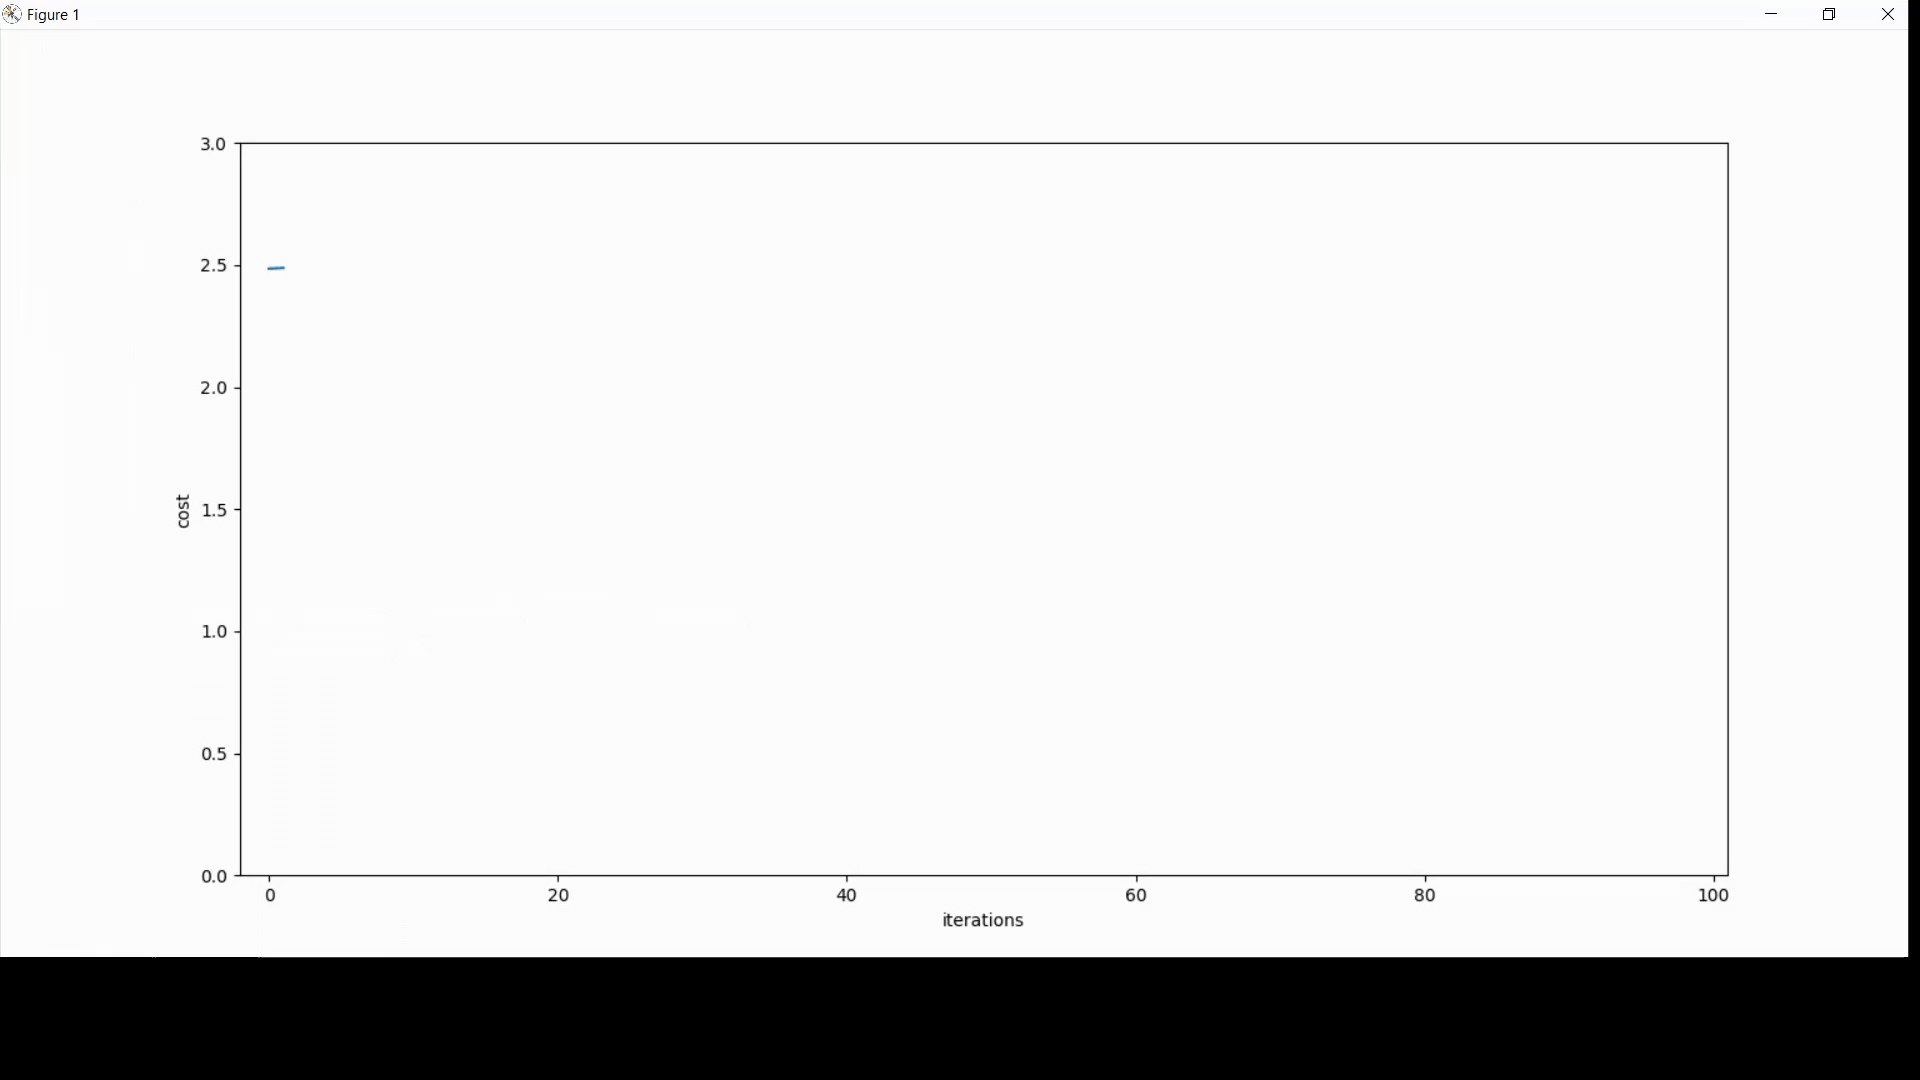

**Mini_batch Training **

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#import layers , forward_model , Losses , backward_model
#from dataset import dataset
import math
#from optimization import momentum ,ADAM
#from Metric import evaluation_metrics
from matplotlib import style
#import matplotlib; matplotlib.use("TkAgg")
#style.use('fivethirtyeight')
#fig = plt.figure()
#ax1 = fig.add_subplot(1, 1, 1)
#from plotting import animate
class training_model:
    '''
    " The class concerned the training using mini_batch gradient descent with optimizations like adam and momnetum GD "
    '''
    def __init__(self,minibatches, activations,alpha=0.07 , no_of_iterations=25, print_cost = True, lambd = 0 ,momentum=0,beta=0.9,ADAM=0):
        '''
        :param minibatches : list of mini_batches after dividing the training set to mini_batches
        :param activations : the type of activation function in each layer
        :param alpha: learning rate
        :param no_of_iterations: number of iterations
        :param print_cost: boolean variable , put it with ( True ) value if you want to print the cost every 10
                    iterations
        :param lambd: regularization parameter
        :param momentum : boolean : put it with ( True ) value if you want to apply the momentum Gradient descent
        :param beta : momentum parameter
        :param ADAM : boolean : put it with a ( True ) value if you want to apply ADAM optimization
        :return : The Trained Parameters for a certain model trained on a certain dataset
        '''
        self.input = minibatches
        self.activation_functions=activations
        self.Beta=beta
        self.learning_rate = alpha
        self.no_of_iterations = no_of_iterations
        self.print_cost=print_cost
        self.regularization_parameter=lambd
        self.momentum_or_no=momentum
        self.adam_or_not=ADAM


    def update_parameters(self,parameters, grads, learning_rate):
        '''
          "The function which is used to update the weights and biases of the model with Vanilla Gradient descent ."
                :param parameters: weights and biases of the past iteration ( before updating )
                :param grads: the Gradients of the weights and biases , the output of the backward propagation
                :param learning_rate: The learning rate
                :return: parameters : updated weights and biases after completing one iteration of the training
        '''
        L = len(parameters) // 2  # number of layers in the neural network
        for l in range(L):
            parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
            parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]

        return parameters
    #def cost_animation(self,cost):
     #   cost = []
      #  self.append[cost]
    #def change_plot(self,y):
      #  self.fig.set_ydata(np.random.rand(100))
       # plt.pause(1)
       # plt.show()
    def animate(i):
        '''
         "A function which is used to draw a live plotting of the Cost function during the training process "
        '''
        # print('hi')
        graph_data = open('costs.txt', 'r').read()
        lines = graph_data.split('\n')
        xs = []
        ys = []
        # plt.title("Learning rate =" + str(self.learning_rate))
        for line in lines:
            if len(line) > 1:
                x, y = line.split(',')
                xs.append(float(x))
                ys.append(float(y))
        ax1.clear()
        plt.ylabel('cost')
        plt.xlabel('iterations')
        #ax1.plot(xs, ys)
    def train(self):
        '''
                " This function considered as the integration of all the past Modules together to start training any model
                  the deep learning engineer will have the option to choose :
                  1- the activation function of each layer
                  2- the loss type
                  3- the number of iterations
                 this function will plot live graph for the training cost and finally will print the the accuracy resulted
                  from the test set training using the parameters resulted from the training set training .
               :return: The Trained parameters
               '''
        adam_flag=1
        #m = self.input.shape[1]  # number of examples
        layers_dimensions = [self.input[0][0].shape[0], 128, 10]
        temp_layers = layers(layers_dimensions)
        # temp_forward = forward_model.forward_model(layers_dimensions)
        # Initialize parameters dictionary.
        parameters = temp_layers.layers_init()
        temp = parameters
        if (self.momentum_or_no):
            velocity=momentum(parameters).velocity_preparation()
        if(self.adam_or_not):
            exponentially_weighted_parameter,RMS_parameter= ADAM(parameters).adam_preparation()
        #print (parameters)
        #print (parameters)
        #print("weights:")
        #print(parameters["W3"].shape)

        # Loop (gradient descent)
        cost_file = open("costs.txt", 'a+')
        cost_file.truncate(0)
        cost_file.close()
        for i in range(0,self.no_of_iterations):
            if (self.momentum_or_no):
              velocity=momentum(parameters).velocity_preparation()
            if(self.adam_or_not):
              exponentially_weighted_parameter,RMS_parameter= ADAM(parameters).adam_preparation()
            for j in range(len(self.input)):
                train_Y = data_set.labels_to_onehot(self.input[i][1])
                train_X = self.input[i][0]
               # scaler = StandardScaler()
               # train_X=scaler.fit_transform(train_X)
                #print(train_X.shape)
                no_of_training_examples=self.input[i][1].shape[1]

                predictions, packet_of_packets = forward_model().forward_model(train_X, parameters,self.activation_functions)

                # print("DONE")

                # Cost function
                if self.regularization_parameter == 0:
                    #print(predictions)
                    cost =  multiclass_loss(train_Y, predictions).cost()
                # print(cost)
                else:
                    cost = regularization().compute_cost_with_regularization(predictions, train_Y, parameters,self.regularization_parameter,"multiclass")

                # Backward propagation.
                #assert (self.regularization_parameter == 0 )  # it is possible to use both L2 regularization and dropout,
            # but this assignment will only explore one at a time
                grads = model_backward_general(predictions, train_Y, packet_of_packets, "multiclass",self.regularization_parameter,self.activation_functions).model_backward()
            # Update parameters.
                if(self.momentum_or_no):
                    parameters, velocity = momentum(parameters).update_with_momentum(velocity, self.learning_rate,
                                                                                     self.Beta, grads)

                elif(self.adam_or_not):
                    parameters,exponentially_weighted_parameter,RMS_parameter=ADAM(parameters).update_with_adam(exponentially_weighted_parameter,RMS_parameter,self.learning_rate,parameters,grads,i)

                else:
                    parameters = self.update_parameters(parameters, grads, self.learning_rate)
            # plot the cost
            #costs.append(cost_avg)
            cost_file = open("costs.txt", 'a+')
            cost_file.write(f"{i},{cost} \n")
            cost_file.close()
            #plt.ion()
            #plt.show()
            #plt.draw()
            #plt.pause(1)
            print(f"cost after epoch{i}: {cost}")
           # plt.figure()
           # plt.plot(costs)
           # plt.ylabel('cost')
           # plt.xlabel('iterations')
           # plt.title("Learning rate =" + str(self.learning_rate))
        #plt.show()

        return parameters

        # self.change_plot(costs)

            # Print the loss every 10000 iterations
            # if self.print_cost and i % 10 == 0:
            #   print("Cost after iteration {}: {}".format(i, cost))
            # if self.print_cost and i % 1000 == 0:
            #   costs.append(cost)




def random_mini_batches(X, Y, mini_batch_size=1024):
    '''
    " this function will divide the whole training examples to small modules each one called ( mini_batch )
    :param X : The whole Training Set AKA all the training examples
    :param Y : The whole Training examples' labels
    :param mini_batch_size: The wanted mini_batch size for the training examples
    :return : a list of mini batches after division
    '''

    m = X.shape[1]  # number of training examples
    mini_batches = []

    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1, m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(
        m / mini_batch_size)  # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:, k * mini_batch_size: (k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size: (k + 1) * mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:, int(m / mini_batch_size) * mini_batch_size:]
        mini_batch_Y = shuffled_Y[:, int(m / mini_batch_size) * mini_batch_size:]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches

if __name__ == "__main__":

    data_set = dataset('mnist', r'mnist_train.csv')
    train_X, train_Y, test_X, test_Y = data_set.get_dataset()
    training_minibatches = random_mini_batches(train_X.T, train_Y)
    #ani = animation.FuncAnimation(fig, training_model.animate, interval=1000)
    # test_X_minibatches = random_mini_batches(test_X.T,test_Y)
    # print(test_Y.shape)
    # print(test_Y)
    # print(train_X.shape)
    # print(test_X.shape)
    # print(train_Y.shape)
    # print(test_Y.shape)

    ''''''
    # for i in range(len(training_minibatches)):
    # train_Y = data_set.labels_to_onehot(training_minibatches[i][1])
    # train_X=training_minibatches[i][0]
    # parameters=1
    # print(train_X.shape)
    # print(train_Y.shape)
    # global parameters
    activation_functions = ["NONE", "sigmoid", "sigmoid"]

    parameters = training_model(training_minibatches,activation_functions).train()
    print("on training set : ")
    print(evaluation_metrics(train_Y, train_X.T, parameters,activation_functions).Accuracy(train_X.shape[0]))
    print("on test set : ")
    print(evaluation_metrics(test_Y, test_X.T, parameters,activation_functions).Accuracy(test_X.shape[0]))
    # print(evaluation_metrics(test_Y,test_X.T,parameters).Accuracy(test_X.shape[0]))
    # print("On the test set:")
    # predictions_test = predict(test_X.T, test_Y, parameters)
    # print(f"cost at iteration={np.mean(cost)}")
    # costs_minibatch.append(np.mean(cost))
    # parameters = training_model(X_train, Y_train).train()
    # print(f"On the training set:{i}")
    # predictions_train = predict(X_train, Y_train, parameters)
    # predictions_train = predict(train_X, train_Y, parameters)
    # print("On the test set:")
    # predictions_test = predict(test_X.T, test_Y, parameters)
    # predictions_test = predict(X_test, Y_test, parameters)

    # print("On the training set:")
    # predictions_train = predict(X_train, Y_train, parameters)
    # predictions_train = predict(train_X, train_Y, parameters)
    # plt.figure()
    # plt.plot(costs_minibatch)
    # plt.ylabel('cost')
    # plt.xlabel('iterations (x1,000)')
    # plt.title("Learning rate =" + str(self.learning_rate))
    # plt.show()
    '''
    plt.title("Model without regularization")
    axes = plt.gca()
    axes.set_xlim([-0.75,0.40])
    axes.set_ylim([-0.75,0.65])
    plot_decision_boundary(lambda x: predict_dec(parameters, test_X.T), train_X, train_Y)
    '''



cost after epoch0: 1.3589846167140531
cost after epoch1: 0.9206089392233754
cost after epoch2: 0.7344053530911936
cost after epoch3: 0.6054268728589567
cost after epoch4: 0.5719348601427281
cost after epoch5: 0.5159660140125513
cost after epoch6: 0.4927794742664358
cost after epoch7: 0.4359114722164269
cost after epoch8: 0.3920034113410821
cost after epoch9: 0.4101150041748651
cost after epoch10: 0.3866158292343131
cost after epoch11: 0.40346467269994973
cost after epoch12: 0.3941196468631608
cost after epoch13: 0.35611043300219936
cost after epoch14: 0.37377786747208475
cost after epoch15: 0.36836490305153896
cost after epoch16: 0.3623351824872138
cost after epoch17: 0.34074326670408606
cost after epoch18: 0.3625887670078388
cost after epoch19: 0.3366068864360622
cost after epoch20: 0.3917656861167832
cost after epoch21: 0.327074558081744
cost after epoch22: 0.3075039192269654
cost after epoch23: 0.33906156891432626
cost after epoch24: 0.31315651560682556
on training set : 
0.90379999

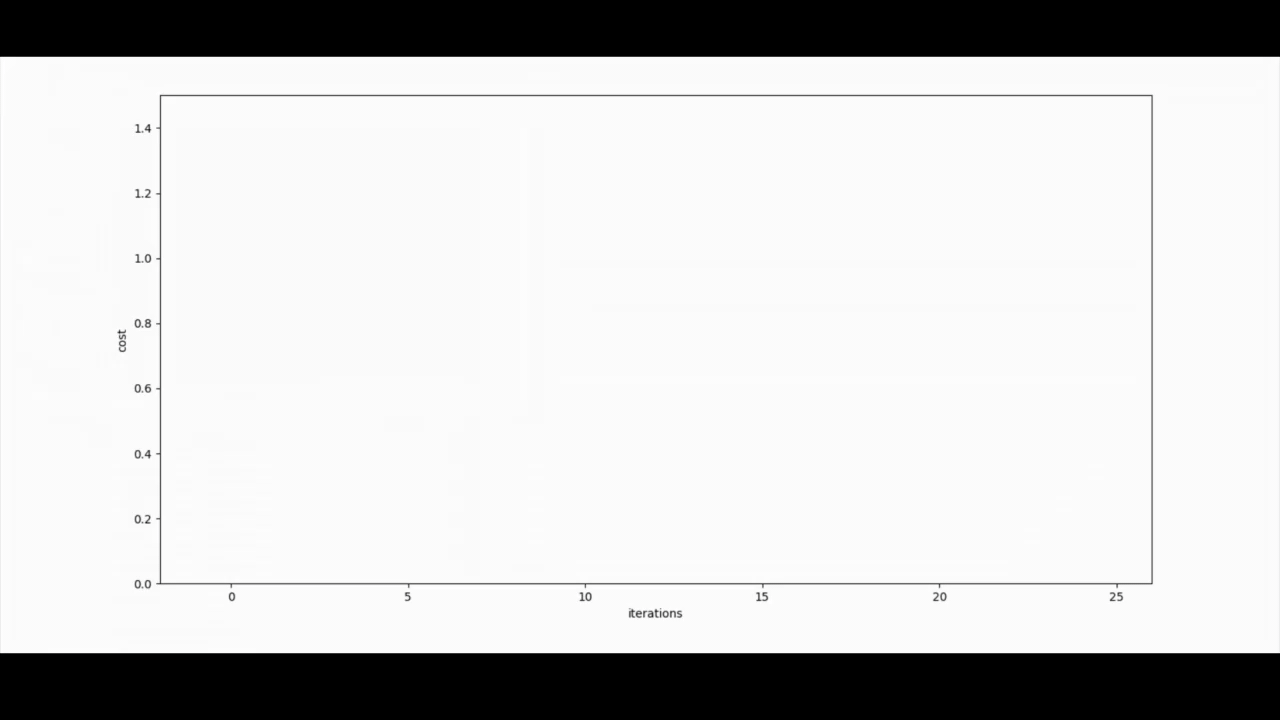

*MiniBatch Training with ADAM*

In [ ]:
training_minibatches = random_mini_batches(train_X.T, train_Y,mini_batch_size=2000)
parameters = training_model(training_minibatches,activation_functions,alpha=0.0007,ADAM=1).train()
print("on training set : ")
print(evaluation_metrics(train_Y, train_X.T, parameters,activation_functions).Accuracy(train_X.shape[0]))
print("on test set : ")
print(evaluation_metrics(test_Y, test_X.T, parameters,activation_functions).Accuracy(test_X.shape[0]))

cost after epoch0: 1.4029933078057089
cost after epoch1: 0.7748600323656432
cost after epoch2: 0.5107133128497947
cost after epoch3: 0.3557351069081647
cost after epoch4: 0.288524496080004
cost after epoch5: 0.2574638905212625
cost after epoch6: 0.28321396197411924
cost after epoch7: 0.29080737632588133
cost after epoch8: 0.27676191237839814
cost after epoch9: 0.2899988983895668
cost after epoch10: 0.32056353810211574
cost after epoch11: 0.2601401784384806
cost after epoch12: 0.27972612990408047
cost after epoch13: 0.29421560579870265
cost after epoch14: 0.2508082290056564
cost after epoch15: 0.25104228166281434
cost after epoch16: 0.2716803228758724
cost after epoch17: 0.2550476161273763
cost after epoch18: 0.26783375315847
cost after epoch19: 0.28849948887652854
cost after epoch20: 0.2561965324509409
cost after epoch21: 0.27888371040209253
cost after epoch22: 0.27465824234815867
cost after epoch23: 0.24844984661398564
cost after epoch24: 0.2884579439177527
on training set : 
0.911099

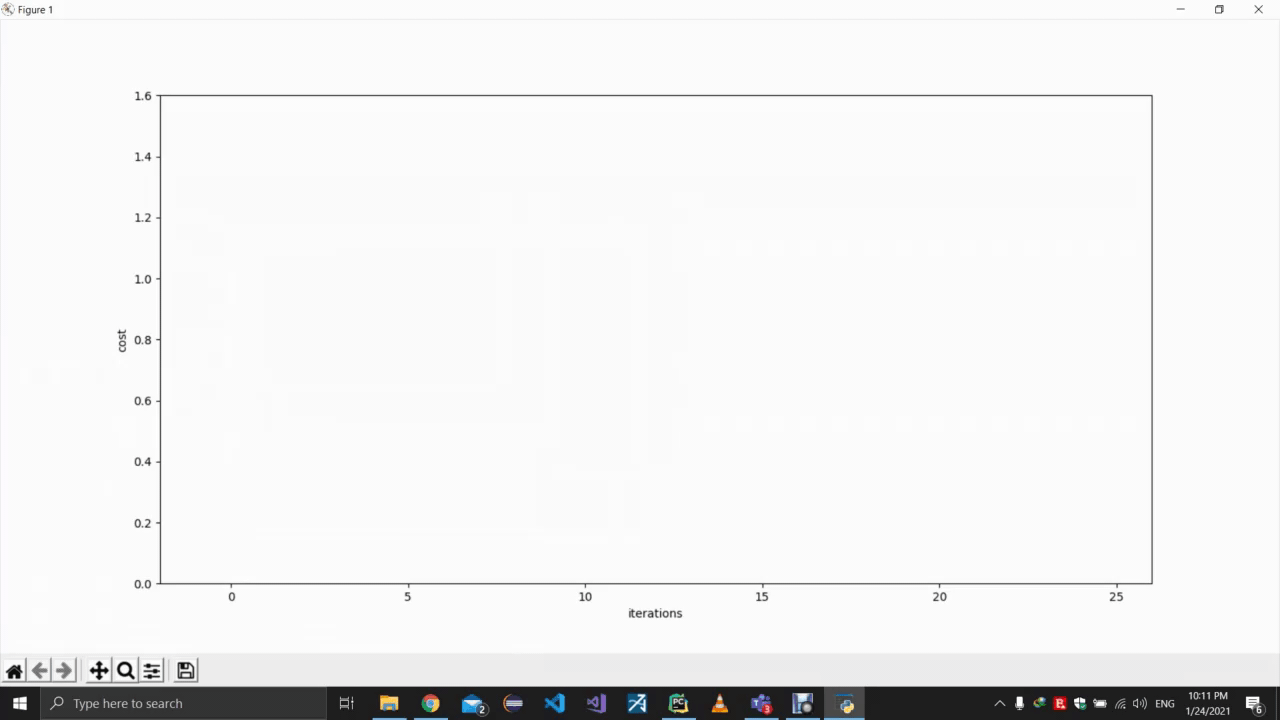

**MiniBatch Training with momentum**

In [ ]:
training_minibatches = random_mini_batches(train_X.T, train_Y,mini_batch_size=1024)
parameters = training_model(training_minibatches,activation_functions,alpha=0.07,momentum=1).train()
print("on training set : ")
print(evaluation_metrics(train_Y, train_X.T, parameters,activation_functions).Accuracy(train_X.shape[0]))
print("on test set : ")
print(evaluation_metrics(test_Y, test_X.T, parameters,activation_functions).Accuracy(test_X.shape[0]))

cost after epoch0: 2.2761924144727868
cost after epoch1: 2.2102243697336865
cost after epoch2: 1.985285787275752
cost after epoch3: 1.6042013167836982
cost after epoch4: 1.2630111789831375
cost after epoch5: 1.038524045000687
cost after epoch6: 0.8919524399605787
cost after epoch7: 0.7539906163365594
cost after epoch8: 0.6602470955634582
cost after epoch9: 0.6303470767422145
cost after epoch10: 0.5578647941283201
cost after epoch11: 0.564102863431796
cost after epoch12: 0.5283378268583659
cost after epoch13: 0.47684403831298616
cost after epoch14: 0.4878155004704617
cost after epoch15: 0.472401770495239
cost after epoch16: 0.44852834739614866
cost after epoch17: 0.42279229757106584
cost after epoch18: 0.42804557638512697
cost after epoch19: 0.3996990036823267
cost after epoch20: 0.4593776135204815
cost after epoch21: 0.38533177368425514
cost after epoch22: 0.35969943843965346
cost after epoch23: 0.39497540045218243
cost after epoch24: 0.3541449538047876
on training set : 
0.89333333333

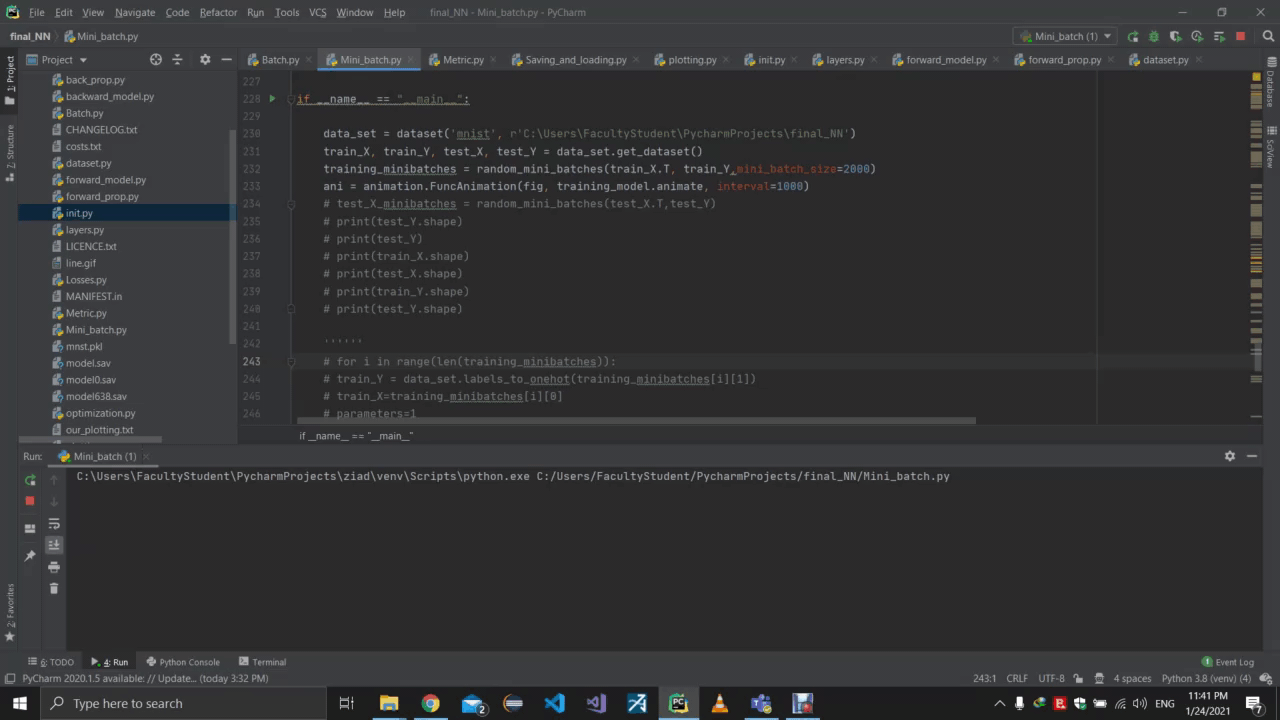

**Batch Training with Momentum**

In [ ]:
data_set = dataset('mnist', r"mnist_train.csv")
train_X, train_Y, test_X, test_Y = data_set.get_dataset()
temp_1 = train_Y
train_Y = (data_set.labels_to_onehot(train_Y))
layers_dimensions = [train_X.T.shape[0], 128, train_Y.shape[0]]
activation_functions = ["NONE", "sigmoid", "sigmoid"]
train_temp=training_model(train_X.T, train_Y, layers_dimensions, activation_functions,momentum=1,alpha=0.6,no_of_iterations=100)
parameters = train_temp.train()
loaded_model=SAL().Save_model(parameters)
data=SAL().Load_model(loaded_model)
temp = evaluation_metrics(temp_1, train_X.T, data,activation_functions).Accuracy(train_X.shape[0])
print(f"On Training Set  : {temp} ")
temp = evaluation_metrics(test_Y, test_X.T, data,activation_functions).Accuracy(test_X.shape[0])
print(f"On Testing Set  : {temp} ")
    

Cost after iteration 0: 11.238603251478096
Cost after iteration 1: 14.436882671727545
Cost after iteration 2: 12.931130728264455
Cost after iteration 3: 14.181302123031347
Cost after iteration 4: 13.294124092989287
Cost after iteration 5: 12.390163782705793
Cost after iteration 6: 8.49547678805454
Cost after iteration 7: 7.945977507930147
Cost after iteration 8: 5.634465894568896
Cost after iteration 9: 3.73503158672738
Cost after iteration 10: 2.9353209963820595
Cost after iteration 11: 2.0842815205759657
Cost after iteration 12: 1.3346142098585245
Cost after iteration 13: 1.0836528475585754
Cost after iteration 14: 1.0411518495341758
Cost after iteration 15: 0.9952638418010545
Cost after iteration 16: 0.9768946760524551
Cost after iteration 17: 0.9437879156997055
Cost after iteration 18: 0.9305490868118999
Cost after iteration 19: 0.9039895628821888
Cost after iteration 20: 0.8935045661938369
Cost after iteration 21: 0.871497890288779
Cost after iteration 22: 0.8627380354479607
Cost 

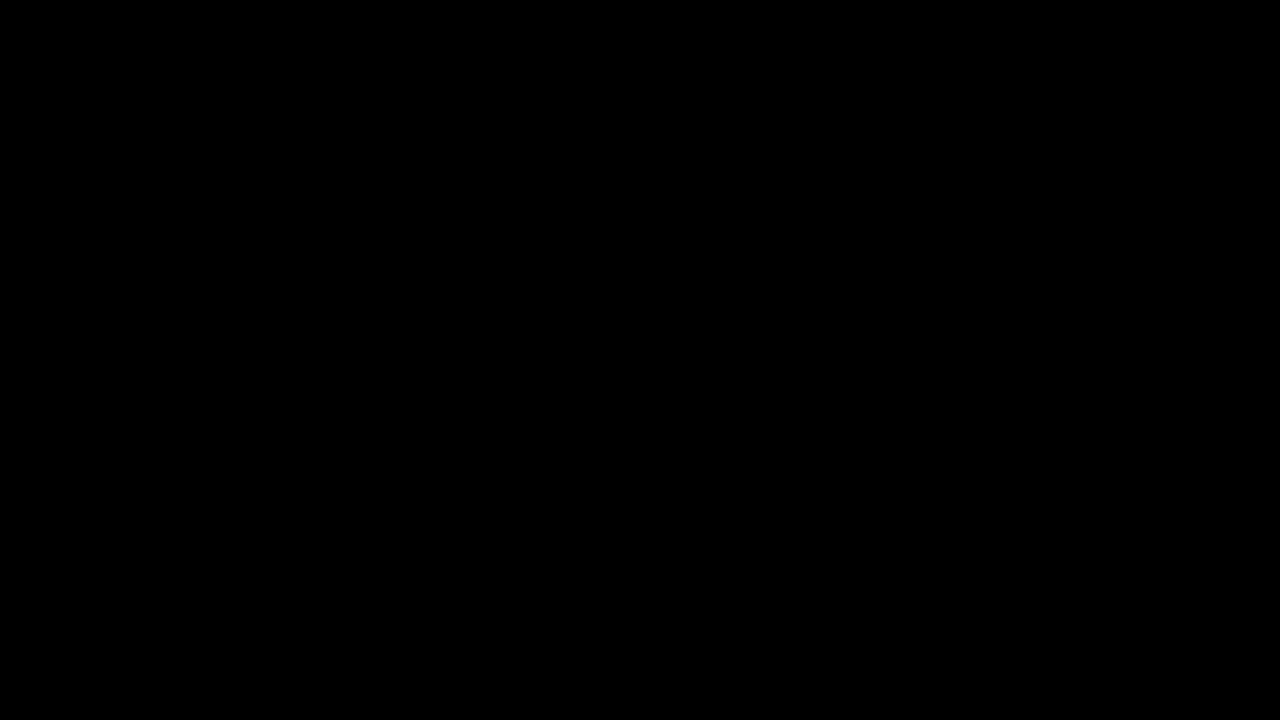

**Batch training With ADAM **

In [ ]:
train_temp=training_model(train_X.T, train_Y, layers_dimensions, activation_functions,ADAM=1,alpha=0.7,no_of_iterations=100)
parameters = train_temp.train()
loaded_model=SAL().Save_model(parameters)
data=SAL().Load_model(loaded_model)
temp = evaluation_metrics(temp_1, train_X.T, data,activation_functions).Accuracy(train_X.shape[0])
print(f"On Training Set  : {temp} ")
temp = evaluation_metrics(test_Y, test_X.T, data,activation_functions).Accuracy(test_X.shape[0])
print(f"On Testing Set  : {temp} ")


Cost after iteration 0: 2.4855436504939172
Cost after iteration 1: 2.6111700744227764
Cost after iteration 2: 2.2063285717984056
Cost after iteration 3: 2.0619911925556567
Cost after iteration 4: 1.7049165579699228
Cost after iteration 5: 1.557286492541841
Cost after iteration 6: 1.4148873071825454
Cost after iteration 7: 1.3180903478734638
Cost after iteration 8: 1.2188453873213516
Cost after iteration 9: 1.1458677811003055
Cost after iteration 10: 1.0758076620725618
Cost after iteration 11: 1.0194931857496863
Cost after iteration 12: 0.9688120028560376
Cost after iteration 13: 0.9244162403466071
Cost after iteration 14: 0.8863335507793447
Cost after iteration 15: 0.85084182590796
Cost after iteration 16: 0.8213198546064359
Cost after iteration 17: 0.7925401450168562
Cost after iteration 18: 0.7690009908345675
Cost after iteration 19: 0.745306265334588
Cost after iteration 20: 0.7260149081948315
Cost after iteration 21: 0.7062414456951783
Cost after iteration 22: 0.6900282017697614
Co